In [2]:
### run after AMT_tidyresults
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
%pprint off

Pretty printing has been turned OFF


In [3]:
def rearrange_col(dataframe, col_to_move, reference_col, right=True):
    col_list = dataframe.columns.values.tolist()
    col_list2 = [x for x in col_list if x != col_to_move]
    reference_idx = col_list2.index(reference_col)
    if right==True:
        col_list3 = []
        for y in col_list2:
            col_list3.append(y)
            if y == reference_col:
                col_list3.append(col_to_move)
        return dataframe[col_list3]
    else:
        col_list3 = []
        for y in col_list2:
            col_list3.append(y)
            if y == reference_col:
                col_list3.insert(-2, col_to_move)
        return  dataframe[col_list3]

In [4]:
savepath = '/Users/songkim/GoogleDrive/Primary/Projects/VerbVector/AMT/html/experiments/ratings2/results'
fpath = '/Users/songkim/GoogleDrive/Primary/Projects/VerbVector/AMT/html/experiments/ratings2/results/results_catchreject_0813.csv'

In [57]:
### PART1: add duration 
from datetime import datetime

res = pd.read_csv(fpath, converters={'response': eval, 'RT': eval, 'buttonpress': eval, 'catch_response': eval})

start = res['start'].values
end = res['end'].values
start_obj = [datetime.strptime(s, '%Y-%m-%d %H:%M:%S') for s in start]
end_obj = [datetime.strptime(e, '%Y-%m-%d %H:%M:%S') for e in end]
duration= [(y - x).seconds for x, y in zip(start_obj, end_obj)]
res['duration(s)'] = duration
res = rearrange_col(res, 'duration(s)', 'end')
#res.tail()

######################## check number of responses per lemma
# for i in set(res['stim_id']): 
#     df = res.loc[res['stim_id']==i]
#     print (i, df.iloc[1,].stim, df.shape[0])


#### PART2: CALCULATE SUBJECT-TO-GROUP CORRELATION PER HIT
################## convert N/A to 0 
res['catch_response_upd'] = res['catch_response'].apply(lambda x: [int(0) if i=='7' else int(i) for i in x])
res['response_upd'] = res['response'].apply(lambda x: [int(0) if i=='7' else int(i) for i in x])

res = rearrange_col(res, 'catch_response_upd', 'catch_response')
res = rearrange_col(res, 'response_upd', 'response')
res

res.drop(columns=['catch_response', 'response'], inplace=True)
res.rename(columns={'response_upd': 'response', 'catch_response_upd':'catch_response'}, inplace=True)

######################### drop bad subjects
print('before catch-based rejection:', res.shape)
res = res.loc[res['badsubject']=='N', ]
res = res.reset_index(drop=True)
print ('after catch-based rejection:', res.shape)

res.head()

before catch-based rejection: (4335, 21)
after catch-based rejection: (4302, 21)


,id,stim_id,stim,subject_id,response,start,end,duration(s),RT,buttonpress,turkcode,subject_num,gender,age,education,occupation,results_id,catch_subject_id,catch_response,incorrectN,badsubject
0,1,159,laugh,1,"[1, 0, 0, 3, 0, 0, 1, 5, 6, 2, 3, 3, 6, 2, 0, ...",2021-05-25 16:26:41,2021-05-25 16:35:15,514,"[10451, 2940, 2319, 3999, 2779, 3110, 6525, 75...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, ...",8545510,A3I9XLIHPPWPN1,f,57,18.0,Dataanalystadministrationassistant,1,1,"[0, 6, 0, 6, 6]",0,N
1,2,295,see,2,"[6, 3, 0, 1, 1, 2, 0, 4, 0, 1, 0, 3, 3, 0, 0, ...",2021-05-25 16:29:38,2021-05-25 16:36:24,406,"[4024, 9148, 2726, 5130, 5199, 3487, 2790, 432...","[1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2727964,A2CWJRAEFZ44HU,m,36,14.0,nursingassistantihelpoutpatientsandstaffinahos...,2,2,"[0, 6, 0, 6, 6]",0,N
2,3,214,flatten,3,"[3, 0, 0, 0, 5, 3, 1, 1, 3, 2, 0, 5, 0, 1, 4, ...",2021-05-25 16:26:58,2021-05-25 16:36:47,589,"[4432, 2912, 2592, 3640, 7976, 6904, 5368, 608...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",3205581,A7ERZELTAMWL5,m,70,18.0,PatrolofficerIridearoundaresidentialcomplextoc...,3,3,"[0, 6, 0, 6, 6]",0,N
3,4,195,increase,4,"[4, 3, 6, 4, 3, 2, 3, 3, 6, 5, 5, 5, 6, 6, 5, ...",2021-05-25 16:30:25,2021-05-25 16:37:35,430,"[2941, 3771, 4392, 2726, 3770, 3690, 2473, 130...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",6434648,A1MKYMYY34DZIO,m,30,16.0,student,4,4,"[4, 6, 5, 6, 6]",2,N
4,5,262,calm,5,"[4, 0, 0, 0, 3, 0, 0, 1, 4, 0, 5, 0, 4, 2, 2, ...",2021-05-25 16:28:07,2021-05-25 16:38:09,602,"[4142, 2349, 7257, 8933, 4802, 3372, 3349, 830...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, ...",1247441,A2LF84L3K71GR2,f,38,12.0,RestaurantSupervisor,5,5,"[0, 6, 0, 6, 6]",0,N


In [61]:
#################### create group average dict ###################### 
stim_id_n = len(set(res['stim_id']))  ###i.e., 320
response_n = len(res.iloc[0]["response"])
print('# of questions:', response_n)

column = []
for i in range(1, response_n+1):
    column.append('q'+str(i))  ##### column = ['q1', 'q2', ... 'q72']

group_dict = {}
for i in range(1, stim_id_n+1): #loop over 320 verbs 
    df = res.loc[res['stim_id']==i, ]
    df_responses = pd.DataFrame(df.response.tolist(), columns=column).astype(int)
    avg = list(df_responses.mean()) #mean rating for each attribute
    avg = [round(a,3) for a in avg]
    std = list(df_responses.std())
    std = [round(s,3) for s in std] #stdev of rating for each attribute


    group_dict[i] = {'stim': df.iloc[0]['stim'], 'subject_ids': df['subject_id'].values.tolist(), 
                  'NofResponse': df.shape[0], 'avg_ratings': avg, 'std_ratings':std} #avg_rating= mean for each attribute

group_df = pd.DataFrame.from_dict(group_dict, orient='index')
group_df.head()

# of questions: 72


,stim,subject_ids,NofResponse,avg_ratings,std_ratings
1,live,"[206, 213, 223, 286, 266, 179, 5, 214, 97, 123...",15,"[2.333, 0.933, 0.2, 0.533, 0.533, 0.933, 0.6, ...","[2.024, 1.223, 0.414, 0.99, 0.915, 1.792, 0.98..."
2,speak,"[7, 435, 7, 19, 40, 374, 3, 531, 160, 341, 100...",14,"[0.857, 0.143, 0.071, 0.071, 0.429, 0.5, 1.071...","[1.351, 0.363, 0.267, 0.267, 0.852, 0.855, 1.3..."
3,listen,"[203, 122, 345, 105, 136, 684, 182, 114, 595, ...",13,"[1.769, 0.692, 1.0, 0.538, 0.769, 1.154, 1.0, ...","[1.922, 1.797, 2.236, 1.127, 1.787, 1.864, 1.7..."
4,walk,"[6, 56, 423, 311, 523, 564, 258, 561, 114, 106...",13,"[1.077, 0.462, 0.0, 0.077, 0.538, 0.462, 0.154...","[1.754, 0.967, 0.0, 0.277, 1.198, 0.877, 0.376..."
5,fly,"[269, 128, 369, 44, 10, 3, 201, 393, 235, 11, ...",13,"[2.769, 1.308, 1.385, 0.923, 1.308, 1.462, 2.5...","[2.351, 2.057, 2.063, 2.253, 2.175, 1.808, 1.8..."


In [64]:
########calculate intersubject correlation and update res
from scipy.stats.stats import pearsonr

#update res so as to include "subject-to-group" correlation
res_dict = res.to_dict(orient='index')
res_dict[1]

for k, v in res_dict.items():
    response = v['response']
    check = v['stim'] == group_dict[v['stim_id']]['stim']
    if check == False:
        print ('something wrong!')
    group_avg = group_dict[v['stim_id']]['avg_ratings']
    v['corr'] = round(pearsonr(response, group_avg)[0],3) ###correlation b/w this vector and group average vector for word X.
    v['corr_fisher'] = np.arctanh(v['corr'])


#pearsonr(response, group_response)[0]

### convert res_dict to df
res_upd = pd.DataFrame.from_dict(res_dict, orient='index') #res updated

### find HITs where the response is constant (i.e., subject hitting the same button all the time)
res_upd[res_upd['corr'].isna()]
print('# of rows before dropping:', res_upd.shape[0])
res_upd = res_upd.dropna(subset=['corr'])
print('# of rows after dropping:', res_upd.shape[0])

## write res_upd to csv 
res_upd.to_csv(savepath + '/HITs_with_correlations_0813.csv', index=False) ### HITs after dropping catch-failed HITs

# of rows before dropping: 4302
# of rows after dropping: 4301


In [65]:
###### plot histogram
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
# res_upd.hist(column='corr', cumulative=True, bins=150, ax=ax)
# fig.savefig(savepath+'/subj_to_group_corr_hist_0813.png') #based on all catch-pass trials

###### plot cumulative distribution of corr ("sort observation by corr")
corr = sorted(res_upd['corr'].tolist())
#plt.step(x=corr, y=np.arange(len(corr)))
plt.step(x=np.arange(len(corr)), y=corr, c="black")
plt.title("observations by correlation")
plt.xlabel("observation")
plt.ylabel("r")
plt.yticks(np.arange(-0.2, 1, 0.1))
plt.grid(axis="y")
plt.savefig(savepath+'/observations_by_correlation_0813.png')


#### drop responses where r < threshold
thre = 0.4
below_thre = res_upd[res_upd['corr']< thre].shape
print('# of responses below r=', thre, ':', below_thre[0])
dropind = res_upd[res_upd['corr'] < thre].index.tolist()
#res_upd.drop([0,1])
print('before:', res_upd.shape)
res_upd.drop(dropind, inplace=True)
print('after:', res_upd.shape)

# of responses below r= 0.4 : 406
before: (4301, 23)
after: (3895, 23)


In [70]:
print ("**** From here, data is 'clean', i.e., w.r.t catch trials & sub-to-group correlation*******")

**** From here, data is 'clean', i.e., w.r.t catch trials & sub-to-group correlation*******


In [71]:
###### Part 2: find out bad words
quesf = '/Users/songkim/GoogleDrive/Primary/Projects/VerbVector/AMT/html/experiments/ratings2/stimuli/questions.txt'
ques = pd.read_csv(quesf, delimiter='\t', header=None).iloc[:, :2].rename(columns={0:'fname', 1:'question'})
q_dict = ques.to_dict(orient='index')

#find only "verb" features
new_q = ques.iloc[67:,]
caused = ques.loc[ques['fname']=='Caused',]

verb_ques = pd.concat([caused, new_q])

In [72]:
verb_ques

,fname,question
46,Caused,To what extent does this verb describe an even...
67,Boundedness,Some verbs refer to an activity that could con...
68,Actor,To what extent does this verb describe somethi...
69,Done to Something Else,To what extent does this verb describe an acti...
70,State of Being,To what extent does this verb describe a <i>ch...
71,Require Energy Input,To what extent is physical or mental energy re...


In [77]:
res_upd.head()

,id,stim_id,stim,subject_id,response,start,end,duration(s),RT,buttonpress,turkcode,subject_num,gender,age,education,occupation,results_id,catch_subject_id,catch_response,incorrectN,badsubject,corr,corr_fisher
0,1,159,laugh,1,"[1, 0, 0, 3, 0, 0, 1, 5, 6, 2, 3, 3, 6, 2, 0, ...",2021-05-25 16:26:41,2021-05-25 16:35:15,514,"[10451, 2940, 2319, 3999, 2779, 3110, 6525, 75...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, ...",8545510,A3I9XLIHPPWPN1,f,57,18.0,Dataanalystadministrationassistant,1,1,"[0, 6, 0, 6, 6]",0,N,0.886,1.403008
1,2,295,see,2,"[6, 3, 0, 1, 1, 2, 0, 4, 0, 1, 0, 3, 3, 0, 0, ...",2021-05-25 16:29:38,2021-05-25 16:36:24,406,"[4024, 9148, 2726, 5130, 5199, 3487, 2790, 432...","[1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2727964,A2CWJRAEFZ44HU,m,36,14.0,nursingassistantihelpoutpatientsandstaffinahos...,2,2,"[0, 6, 0, 6, 6]",0,N,0.758,0.991497
2,3,214,flatten,3,"[3, 0, 0, 0, 5, 3, 1, 1, 3, 2, 0, 5, 0, 1, 4, ...",2021-05-25 16:26:58,2021-05-25 16:36:47,589,"[4432, 2912, 2592, 3640, 7976, 6904, 5368, 608...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",3205581,A7ERZELTAMWL5,m,70,18.0,PatrolofficerIridearoundaresidentialcomplextoc...,3,3,"[0, 6, 0, 6, 6]",0,N,0.766,1.010576
4,5,262,calm,5,"[4, 0, 0, 0, 3, 0, 0, 1, 4, 0, 5, 0, 4, 2, 2, ...",2021-05-25 16:28:07,2021-05-25 16:38:09,602,"[4142, 2349, 7257, 8933, 4802, 3372, 3349, 830...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, ...",1247441,A2LF84L3K71GR2,f,38,12.0,RestaurantSupervisor,5,5,"[0, 6, 0, 6, 6]",0,N,0.795,1.084875
5,6,7,jump,6,"[3, 0, 0, 0, 0, 1, 0, 3, 6, 3, 0, 0, 0, 6, 0, ...",2021-05-25 16:29:58,2021-05-25 16:45:19,921,"[9500, 3180, 3371, 90941, 4762, 8544, 6685, 40...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",8286749,A1VSHM4NLZ705D,m,41,12.0,retail,6,6,"[0, 6, 0, 6, 6]",0,N,0.859,1.289517


In [89]:
## export data (for each verb, one response for each feature)
res_clean = res_upd[["stim_id", "stim", "subject_id", "response", "duration(s)", "age", "education", "incorrectN", "corr_fisher"]]
new_column= list(range(response_n)) #[0,1,2,...71]
res_clean[new_column] = pd.DataFrame(res_clean.response.tolist(), index= res_clean.index)

d = dict()
#for i in [46,67,68,69,70,71]:
for i in range(0,response_n):
    d[i] = q_dict[i]['fname']

res_clean = res_clean.rename(columns=d)
#res_clean = res_clean.drop(columns=['response'])

##export res_sub
savepath = '/Users/songkim/GoogleDrive/Primary/Projects/VerbVector/AMT/html/experiments/ratings2/results'
res_clean.to_csv(savepath+'/clean_HITs_0813.csv', index=False) ##HITs that only include crucial info
res_clean.head()

,stim_id,stim,subject_id,response,duration(s),age,education,incorrectN,corr_fisher,Vision,Bright,Dark,Color,Pattern,Large,Small,Motion,Biomotion,Fast,Slow,Shape,Face,Body,Touch,Hot,Cold,Smooth,Rough,Light,Heavy,Pain,Audition,Loud,Low,High,Sound,Music,Speech,Taste,Smell,Head,UpperLimb,LowerLimb,Practice,Landmark,Path,Scene,Near,Toward,Away,Number,Time,Duration,Long,Short,Caused,Consequential,Social,Human,Communication,Self,Cognition,Benefit,Harm,Pleasant,Unpleasant,Happy,Sad,Angry,Disgusted,Fearful,Surprised,Drive,Needs,Attention,Arousal,Boundedness,Actor,Done to Something Else,State of Being,Require Energy Input
0,159,laugh,1,"[1, 0, 0, 3, 0, 0, 1, 5, 6, 2, 3, 3, 6, 2, 0, ...",514,57,18.0,0,1.403008,1,0,0,3,0,0,1,5,6,2,3,3,6,2,0,0,0,0,0,0,0,0,2,2,2,5,6,1,4,0,0,6,0,0,6,0,0,2,0,0,0,0,0,3,0,5,2,3,5,4,4,6,5,5,0,6,0,6,0,1,0,1,3,3,1,5,6,1,4,0,5,4
1,295,see,2,"[6, 3, 0, 1, 1, 2, 0, 4, 0, 1, 0, 3, 3, 0, 0, ...",406,36,14.0,0,0.991497,6,3,0,1,1,2,0,4,0,1,0,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,6,1,0,0,2,0,0,0,0,0,0,1,0,0,0,1,4,2,0,1,0,4,0,0,0,0,0,0,0,1,2,4,1,0,5,0,0,1
2,214,flatten,3,"[3, 0, 0, 0, 5, 3, 1, 1, 3, 2, 0, 5, 0, 1, 4, ...",589,70,18.0,0,1.010576,3,0,0,0,5,3,1,1,3,2,0,5,0,1,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4,1,3,0,0,1,2,0,0,0,0,0,4,1,4,4,2,5,0,0,0,5,2,4,1,0,0,0,0,0,0,2,0,1,0,4,5,6,0,3
4,262,calm,5,"[4, 0, 0, 0, 3, 0, 0, 1, 4, 0, 5, 0, 4, 2, 2, ...",602,38,12.0,0,1.084875,4,0,0,0,3,0,0,1,4,0,5,0,4,2,2,2,0,1,0,0,0,0,3,0,1,0,1,3,4,0,2,2,0,0,3,3,0,3,2,6,3,0,3,1,2,3,4,2,3,5,1,4,6,6,1,6,0,6,0,0,0,0,0,6,0,0,0,0,3,0,6,3
5,7,jump,6,"[3, 0, 0, 0, 0, 1, 0, 3, 6, 3, 0, 0, 0, 6, 0, ...",921,41,12.0,0,1.289517,3,0,0,0,0,1,0,3,6,3,0,0,0,6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6,6,3,3,3,2,2,0,0,0,6,0,6,3,2,3,6,0,1,0,3,3,1,0,0,0,0,0,2,2,6,1,6,3,1,5,3,6,6


In [122]:
#### create df of standard deviation and mean for each word (i.e., word x features)
res_clean = pd.read_csv(savepath+'/clean_HITs_0813.csv')
stim_ids = sorted(res_clean['stim_id'].unique())

res_clean.head()

#create new empty df 
orig_cols = res_clean.columns.values.tolist()
rmlist = ['subject_id', 'response', 'age', 'education', 'duration(s)', 'incorrectN', 'corr_fisher']
new_cols = [o for o in orig_cols if o not in rmlist]

df_sd = pd.DataFrame(columns=new_cols)

#1. iterate over 320 verbs and append new row (SD) to df
for i in stim_ids:
    df_sel = res_clean.loc[res_clean['stim_id']==i, ]
    stim_id = df_sel['stim_id'].unique()[0]
    stim = df_sel['stim'].unique()[0]

    df_features = df_sel.drop(columns=['stim_id', 'stim', 'subject_id', 'response', 'age', 'education', 
                                       'duration(s)', 'incorrectN', 'corr_fisher'])
    new_row_sd = round(df_features.std(),2).to_frame().T #row of standard deviations
    new_row_sd['mean_72feat_SD'] = round(new_row_sd.mean(numeric_only=True, axis=1),3).values[0]
    sixfeatures = ["Caused", "Boundedness", "Actor", "Done to Something Else", "State of Being", "Require Energy Input"]
    new_row_sd['mean_6feat_SD'] = round(new_row_sd.loc[:, sixfeatures].mean(axis=1),3).values[0]
    new_row_sd['stim_id'] = stim_id
    new_row_sd['stim'] = stim
    new_row_sd['responseN'] = int(df_sel.shape[0])
    df_sd = df_sd.append(new_row_sd, sort=False)
    del new_row_sd


# #2. iterate over 320 verbs and append new row (mean) to df
df_mean = pd.DataFrame(columns=new_cols)

for k in stim_ids:
    df_sel = res_clean.loc[res_clean['stim_id']==k, ]
    stim_id = df_sel['stim_id'].unique()[0]
    stim = df_sel['stim'].unique()[0]

    df_features = df_sel.drop(columns=['stim_id', 'stim', 'subject_id', 'response', 'age', 'education', 
                                       'duration(s)', 'incorrectN', 'corr_fisher'])
    new_row_mean = round(df_features.mean(),2).to_frame().T
    new_row_mean['stim_id'] = stim_id
    new_row_mean['stim'] = stim
    df_mean = df_mean.append(new_row_mean, sort=False)
    del new_row_mean
    

col_mean = [n+'-m' if new_cols.index(n)>1 else n for n in new_cols] # m meaning 'mean'
df_mean.columns = col_mean
df_mean = df_mean.drop(columns = 'stim')
#df_mean.head()

#3. add mean SD for each row
if df_mean.shape[0] != df_sd.shape[0]:
    print ('mean df and sd df have different lengths!')

df_fin = pd.merge(df_sd, df_mean, on = 'stim_id') # df that has both SD and MEAN (fin meaning 'final')

# clean up
df_fin['responseN'] = df_fin['responseN'].astype(int)
df_fin = rearrange_col(df_fin, 'responseN', 'stim')
df_fin = rearrange_col(df_fin, 'mean_72feat_SD', 'responseN')
df_fin = rearrange_col(df_fin, 'mean_6feat_SD', 'mean_72feat_SD')

df_fin.head()
df_fin.to_csv(savepath + '/clean_320verbs_SD_Mean.csv', index=False)

In [72]:
#########PART3: move to verblist (integrate with rating information)
sdpath = savepath + '/clean_320verbs_SD_Mean.csv'
spreadsheetpath = '/Users/songkim/GoogleDrive/Primary/Projects/VerbVector/Verblists/List320.csv'

df_sd = pd.read_csv(sdpath, index_col=0)
df_ss = pd.read_csv(spreadsheetpath) #ss meaning spreadsheet
df_ss = df_ss.loc[df_ss['in']==1]

check = df_sd.shape[0] == df_ss.shape[0]
if check !=1:
    print ('spreadsheet and sd table have diff lengths!')

### add sd and mean to the verblist
df_ss2 = pd.merge(left=df_ss, right=df_sd, left_on= 'Lemma', right_on='stim')

### clean up merged df
df_ss2.drop(columns=['badverb', 'GrandIndex', 'in', 'whyexcluded', 'stim', 'abs_marginality', 
                     'rel_marginality', 'SynClassLitrt', 'SynClassSK', 'good'], inplace=True)

#### add mean (subject-to-group) correlation to df_ss2 ##### (optional)
thre=0.4
corr_raw = pd.read_csv(savepath + '/HITs_with_correlations_0813.csv')
corr_thre = corr_raw[corr_raw['corr']>=thre] #only keep HITs above threshold (of raw corr)
#corr_thre.shape

corr_thre = corr_thre[["stim_id", "stim", "subject_id", "corr", "corr_fisher"]]
corr_thre['corr_fisher'] = corr_thre['corr_fisher'].round(decimals=3)
corr_thre['corr'] = corr_thre['corr'].round(decimals=3)   

from statistics import mean
corr_dict = {}
for i in range(1,321):
    df_sel = corr_thre.loc[corr_thre['stim_id']==i]
    stim_id = df_sel.iloc[0]['stim_id']
    stim = df_sel.iloc[0]['stim']
    corr_list = df_sel['corr_fisher'].values.tolist()
    corr_list.sort(reverse=True)
    corr_list = [round(c,3) for c in corr_list]
    mean_corr = round(df_sel['corr_fisher'].mean(), 3)
    
    d_add = {'stim_id': stim_id, 'stim': stim, 'corr_list':corr_list, 'mean_fcorr':mean_corr}
    corr_dict[i] = d_add

corr_df = pd.DataFrame.from_dict(corr_dict, orient='index')
#corr_df.head()
# corr_df[corr_df['stim']=='urinate']

df_ss_out = pd.merge(left=df_ss2, right=corr_df, left_on='Lemma', right_on='stim')
df_ss_out = df_ss_out.drop(columns=['stim'])
df_ss_out = rearrange_col(df_ss_out, 'responseN', 'freq_matched')
# df_sd_out = rearrange_col(df_sd_out, 'corr_list', 'mean_fcorr')
df_ss_out = rearrange_col(df_ss_out, 'mean_72feat_SD', 'responseN')
df_ss_out = rearrange_col(df_ss_out, 'mean_6feat_SD', 'mean_72feat_SD')
df_ss_out = rearrange_col(df_ss_out, 'mean_fcorr', 'mean_6feat_SD')
df_ss_out = rearrange_col(df_ss_out, 'stim_id', 'Lemma')
df_ss_out = rearrange_col(df_ss_out, 'corr_list', 'mean_fcorr', right=False)
######
df_ss_out.head()

### write to csv
# savepath = '/Users/songkim/GoogleDrive/Primary/Projects/VerbVector/AMT/html/experiments/ratings2/results'
# df_ss_out.to_csv(savepath + '/list320_with_ratingsummary_0813.csv', index=False)

,Lemma,stim_id,syn_matched,freq_matched,responseN,mean_72feat_SD,corr_list,mean_6feat_SD,mean_fcorr,LogFreqHAL,Concreteness,AgeofAcqsn,Database,Trans_Intrans,SynClass,Note,google_intrans,google_trans,AspClass,ChangeOfState,SemClass,SemanticTypeLevin,SemanticTypeEntry,Percentage_dom_PoS,Length,Ortho_N,Phono_N,OLD,PLD,NPhon,NSyll,I_Mean_RT,I_Mean_Accuracy,I_NMG_Mean_RT,I_NMG_Mean_Accuracy,N2_F,N3_F,I_Mean_RT_z,I_Mean_Accuracy_z,AgeofAcqsn_z,LogFreqHAL_z,Vision,Bright,Dark,Color,Pattern,Large,Small,Motion,Biomotion,Fast,Slow,Shape,Face,Body,Touch,Hot,Cold,Smooth,Rough,Light,Heavy,Pain,Audition,Loud,Low,High,Sound,Music,Speech,Taste,Smell,Head,UpperLimb,LowerLimb,Practice,Landmark,Path,Scene,Near,Toward,Away,Number,Time,Duration,Long,Short,Caused,Consequential,Social,Human,Communication,Self,Cognition,Benefit,Harm,Pleasant,Unpleasant,Happy,Sad,Angry,Disgusted,Fearful,Surprised,Drive,Needs,Attention,Arousal,Boundedness,Actor,Done to Something Else,State of Being,Require Energy Input,Vision-m,Bright-m,Dark-m,Color-m,Pattern-m,Large-m,Small-m,Motion-m,Biomotion-m,Fast-m,Slow-m,Shape-m,Face-m,Body-m,Touch-m,Hot-m,Cold-m,Smooth-m,Rough-m,Light-m,Heavy-m,Pain-m,Audition-m,Loud-m,Low-m,High-m,Sound-m,Music-m,Speech-m,Taste-m,Smell-m,Head-m,UpperLimb-m,LowerLimb-m,Practice-m,Landmark-m,Path-m,Scene-m,Near-m,Toward-m,Away-m,Number-m,Time-m,Duration-m,Long-m,Short-m,Caused-m,Consequential-m,Social-m,Human-m,Communication-m,Self-m,Cognition-m,Benefit-m,Harm-m,Pleasant-m,Unpleasant-m,Happy-m,Sad-m,Angry-m,Disgusted-m,Fearful-m,Surprised-m,Drive-m,Needs-m,Attention-m,Arousal-m,Boundedness-m,Actor-m,Done to Something Else-m,State of Being-m,Require Energy Input-m
0,live,1,1,1,15,1.549,"[1.389, 1.305, 1.211, 1.142, 1.088, 1.066, 1.0...",1.932,0.976,11.763,3.57,6.10,CREA,intransitive only,unergative,NaN,91.49,8.51,State,0,existence,"verbs of ingesting, lodge verbs, verbs of exis...","39.6gorge, 46lodge, 47.1exist",0.89,4,16,21,1.15,1.25,3,1,629.886,1.00,553.769,0.963,3645.64,606.44,-1.142495,0.80,-1.219595,2.334583,2.02,1.22,0.41,0.99,0.92,1.79,0.99,2.16,2.05,1.79,1.40,1.55,1.80,2.16,1.86,1.25,1.12,1.24,1.15,1.74,0.83,1.94,2.06,1.39,0.35,1.29,0.94,1.18,1.87,1.40,1.77,2.39,2.27,1.99,0.91,2.19,1.88,1.67,1.62,1.11,1.40,0.74,2.04,1.75,1.44,1.46,1.99,1.77,1.21,1.69,1.77,1.23,1.51,2.20,1.60,1.50,0.83,1.73,1.23,1.10,1.32,1.52,1.41,1.32,2.25,1.77,1.46,2.07,1.99,1.68,1.99,1.87,2.33,0.93,0.20,0.53,0.53,0.93,0.60,2.67,4.07,1.73,1.67,1.53,2.40,3.60,1.80,0.87,0.60,0.60,0.80,0.80,0.40,2.07,2.33,0.93,0.13,0.67,0.80,0.60,3.27,1.60,1.47,2.87,3.00,2.60,5.40,2.27,2.13,1.73,1.07,0.67,0.67,0.53,2.20,2.93,4.73,2.00,2.67,3.87,4.20,5.00,3.00,5.33,4.00,3.40,0.87,4.67,0.47,3.87,1.33,0.93,0.80,0.80,1.00,3.80,4.27,2.13,4.00,3.13,3.40,1.40,3.67,3.93
1,speak,2,1,1,14,1.400,"[1.528, 1.522, 1.488, 1.403, 1.346, 1.346, 1.2...",1.753,1.228,10.891,3.7,3.56,CREA,both,unergative,NaN,84.50,15.50,Process,0,communication,verbs of communication,37.5talk,1.00,5,4,12,1.70,1.30,4,1,598.719,1.00,645.130,1.000,973.45,284.91,-1.373396,0.80,-2.077703,1.971250,1.35,0.36,0.27,0.27,0.85,0.85,1.33,1.70,1.61,1.33,1.49,0.85,1.73,2.22,0.27,0.80,0.80,1.34,0.80,0.58,0.58,1.63,1.52,1.00,1.65,1.34,0.76,1.80,0.00,0.61,0.00,0.80,1.38,0.27,1.60,2.04,1.51,2.04,1.89,1.73,2.13,1.16,1.82,1.96,1.49,1.82,2.04,1.65,1.73,1.72,0.00,1.82,1.96,2.55,1.83,1.16,1.94,1.57,1.98,2.03,1.69,1.99,1.73,1.99,2.28,1.70,1.65,1.35,1.60,2.11,1.68,1.74,0.86,0.14,0.07,0.07,0.43,0.50,1.07,1.14,4.50,1.07,0.93,0.43,5.29,1.79,0.07,0.21,0.21,0.36,0.21,0.21,0.21,0.79,5.00,3.07,2.50,2.64,5.57,2.00,6.00,0.29,0.00,5.79,1.07,0.07,5.57,1.00,0.86,1.79,1.21,0.93,3.07,0.50,1.64,2.00,2.07,2.29,2.21,3.64,5.07,4.79,6.00,5.07,4.00,3.29,2.43,3.50,1.71,3.00,1.36,2.14,0.93,1.43,1.29,2.43,4.14,4.43,3.64,1.14,5.57,2.14,2.71,3.43
2,listen,3,1,1,11,1.471,"[1.301, 1.249, 1.145, 1.121, 1.043, 0.991, 0.9...",1.935,1.005,10.432,3.47,5.40,CREA,intransitive only,unergative,NaN,98.81,1.19,Process,0,perception,"verbs of perception, verbs of searching","30.3peer, 35.5

== SD for 6 feature =======
10 percent: 1.414
50 percent: 1.688
90 percent: 1.938
== SD for all features =====
10 percent: 1.055
50 percent: 1.25
90 percent: 1.439
== mean fisher correlation =====
10 percent: 0.849
50 percent: 1.027
90 percent: 1.219


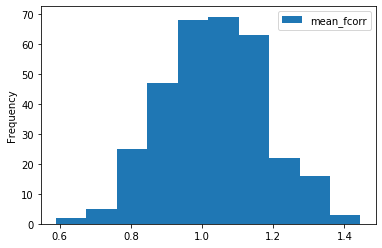

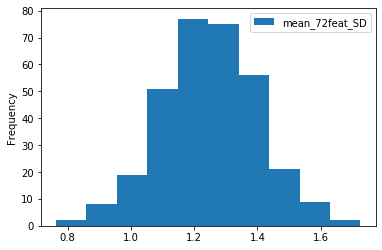

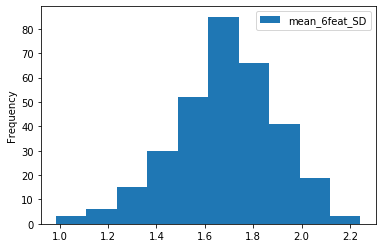

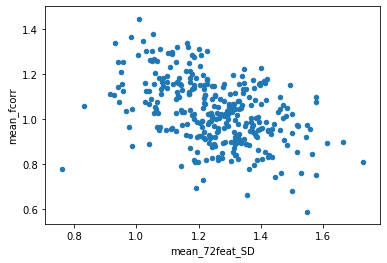

In [75]:
df_ss_out.plot(y=["mean_fcorr"], kind="hist")
df_ss_out.plot(y=["mean_72feat_SD"], kind="hist")
df_ss_out.plot(y=["mean_6feat_SD"], kind="hist")
df_ss_out.plot(x="mean_72feat_SD", y="mean_fcorr", kind="scatter")

# find percentiles
print ('== SD for 6 feature =======')
for x in [10, 50, 90]:
    percentile = np.percentile(df_ss_out['mean_6feat_SD'], x, interpolation='midpoint')
    print (x,'percent:', round(percentile,3))
    
print ('== SD for all features =====')
for y in [10, 50, 90]:
    percentile = np.percentile(df_ss_out['mean_72feat_SD'], y, interpolation='midpoint')
    print (y,'percent:', round(percentile,3))
    
print ('== mean fisher correlation =====')
for y in [10, 50, 90]:
    percentile = np.percentile(df_ss_out['mean_fcorr'], y, interpolation='midpoint')
    print (y,'percent:', round(percentile,3))

In [ ]:
######### PART 4: WITH UPDATED VERBLIST, NARROW DOWN TO 200 VERBS

# of durations: 3895
# of durations after trimming: 3809
['Lemma', 'stim_id', 'syn_matched', 'freq_matched', 'responseN', 'mean_72feat_SD', 'corr_list', 'mean_6feat_SD', 'mean_fcorr', 'LogFreqHAL', 'Concreteness', 'AgeofAcqsn', 'Database', 'Trans_Intrans', 'SynClass', 'Note', 'google_intrans', 'google_trans', 'AspClass', 'ChangeOfState', 'SemClass', 'SemanticTypeLevin', 'SemanticTypeEntry', 'Percentage_dom_PoS', 'Length', 'Ortho_N', 'Phono_N', 'OLD', 'PLD', 'NPhon', 'NSyll', 'I_Mean_RT', 'I_Mean_Accuracy', 'I_NMG_Mean_RT', 'I_NMG_Mean_Accuracy', 'N2_F', 'N3_F', 'I_Mean_RT_z', 'I_Mean_Accuracy_z', 'AgeofAcqsn_z', 'LogFreqHAL_z', 'Vision', 'Bright', 'Dark', 'Color', 'Pattern', 'Large', 'Small', 'Motion', 'Biomotion', 'Fast', 'Slow', 'Shape', 'Face', 'Body', 'Touch', 'Hot', 'Cold', 'Smooth', 'Rough', 'Light', 'Heavy', 'Pain', 'Audition', 'Loud', 'Low', 'High', 'Sound', 'Music', 'Speech', 'Taste', 'Smell', 'Head', 'UpperLimb', 'LowerLimb', 'Practice', 'Landmark', 'Path', 'Scene', 'Near', '

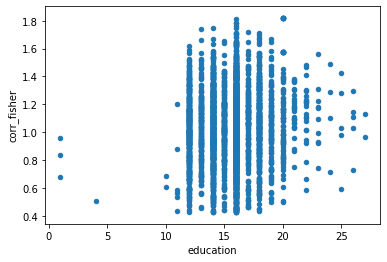

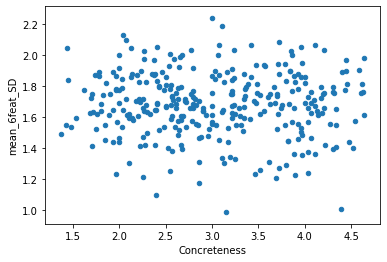

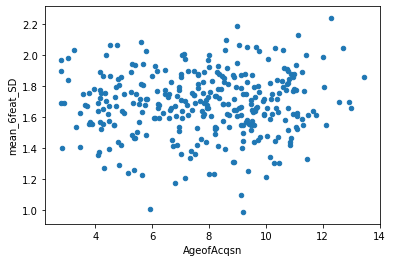

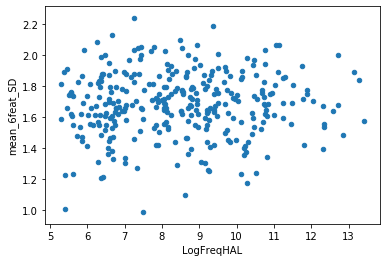

In [6]:
##### explore rating

clean_hit = pd.read_csv(savepath+'/clean_HITs_0813.csv')
clean_hit.head()

#1) plot duration
#clean_hit.plot(y=["duration(s)"], kind="hist", bins=100)
dur = sorted(clean_hit['duration(s)'].tolist())
print('# of durations:', len(dur))
dur_trim = [d for d in dur if d < 3000]
print ('# of durations after trimming:', len(dur_trim))
# plt.step(x=np.arange(len(dur_trim)), y=dur_trim, c="black")
# plt.xlabel("observation")
# plt.ylabel("duration (in sec)")


## 1) correlation b/w 
clean_hit = clean_hit[clean_hit['education']<30]
clean_hit.plot(x="education", y="corr_fisher", kind="scatter")


clean_verbs = pd.read_csv(savepath + '/list320_with_ratingsummary_0813.csv')
#clean_verbs.head()
print(clean_verbs.columns.tolist())

#2) 
clean_verbs.plot(x="Concreteness", y="mean_6feat_SD", kind="scatter") 
clean_verbs.plot(x="AgeofAcqsn", y="mean_6feat_SD", kind="scatter") 
clean_verbs.plot(x="LogFreqHAL", y="mean_6feat_SD", kind="scatter")

# years of education & deviation from group mean
# time spent & deviation from group mean++

In [68]:
#### find semantic categories
clean_verbs.head()
from termcolor import colored
badverb = ['vaporize', 'extract', 'constitute', 'intensify', 'solidify', 'disperse', 'deepen', 'dampen', 'purify', 
          'omit', 'suffocate', 'subside', 'throb', 'resume', 'classify', 'submerge', 'suppress', 'consolidate', 
           'calm', 'involve']
clean_verbs_sub = clean_verbs[["Lemma", "syn_matched", "freq_matched", "AspClass", "SemClass", "ChangeOfState"]]
clean_verbs_sub.head()
semclass = clean_verbs['SemClass'].unique()
# for i in semclass:
#     df = clean_verbs_sub.loc[clean_verbs_sub['SemClass']==i]
#     lemmalist = df['Lemma'].tolist()
#     print (i, df.shape[0])
#     for l in lemmalist: 
#         if l in badverb: 
#             x = print (colored(l, 'red'))
#         else:
#             print (l)
#     print ('---------------')

changeofstate = clean_verbs_sub.loc[clean_verbs_sub['ChangeOfState']==1]['Lemma'].tolist()
changeofstate
for b in badverb:
    if b in changeofstate:
        print (b, 'yes')
    else:
        print(b, 'no')


# semclass = clean_verbs['SemClass'].unique()
# for k in semclass:
#     df = clean_verbs_sub.loc[clean_verbs_sub['SemClass']==k]
#     print (k, df.shape[0])
#     print (df['Lemma'].tolist())
#     print ('---------------')
    
# aspclass = clean_verbs['AspClass'].unique()
# for k in aspclass:
#     df = clean_verbs_sub.loc[clean_verbs_sub['AspClass']==k]
#     print (k, df.shape[0])
#     print (df['Lemma'].tolist())
#     print ('---------------')
print(len(changeofstate))

vaporize yes
extract no
constitute no
intensify yes
solidify yes
disperse yes
deepen yes
dampen yes
purify yes
omit no
suffocate no
subside yes
throb no
resume no
classify no
submerge yes
suppress no
consolidate no
calm no
involve no
77


In [65]:
# quantitative differences between a priori categories
syn_cat = ['unerg', 'unacc', 'trans']
asp_cat = ['activity', 'state', 'achvm']
# For each comparison, an unpaired t-test was conducted for 72 attributes ()
# x = ['vision' rating for unergatives], y = ['vision' rating for unaccusative]

In [ ]:
# k means cluster analysis
### k-means cluster analysis of the entire 320 word set, with k =? 

In [77]:
###### pick bad verbs 
n=20
df = pd.read_csv(savepath + '/list320_with_ratingsummary_0813.csv')
df_sub = df[(df['syn_matched']==0) & (df['freq_matched']==0)]
by_72sd = df_sub.sort_values(by='mean_72feat_SD', ascending=False)['Lemma'].tolist()[:n]
by_6sd = df_sub.sort_values(by='mean_6feat_SD', ascending=False)['Lemma'].tolist()[:n]
by_freq = df_sub.sort_values(by='LogFreqHAL', ascending=True)['Lemma'].tolist()[:n]
by_ageofaqsn = df_sub.sort_values(by='AgeofAcqsn', ascending=False)['Lemma'].tolist()[:n]
by_meancorr = df_sub.sort_values(by='mean_fcorr', ascending=True)['Lemma'].tolist()[:n]
#df.shape[0] - df_sub.shape[0]
#df[(df['category'] == 'A') & (df['value'].between(10,20))]
by_meancorr

['constitute', 'subside', 'dampen', 'deepen', 'detect', 'recognize', 'throb', 'diminish', 'stop', 'stiffen', 'break', 'submerge', 'extract', 'insert', 'eliminate', 'disable', 'intensify', 'appear', 'drop', 'vaporize']

In [15]:
by_meancorr

['constitute', 'subside', 'dampen', 'deepen', 'detect', 'recognize', 'throb', 'diminish', 'stop', 'stiffen', 'break', 'submerge', 'extract', 'insert', 'eliminate', 'disable', 'intensify', 'appear', 'drop', 'vaporize', 'prefer', 'float', 'increase', 'use', 'decrease', 'calm', 'include', 'wobble', 'survive', 'darken', 'generate', 'describe', 'release', 'omit', 'perceive', 'regret', 'circulate', 'predict', 'jiggle', 'expect']

In [11]:
combined = by_72sd + by_6sd + by_freq + by_ageofaqsn + by_meancorr
df_lookup = clean_verbs.loc[clean_verbs['Lemma'].isin(combined)]
verbs = list(set(combined))
bad_df = pd.DataFrame(columns = ['verb', 'count'])
for n in range(len(verbs)):
    ind = df_lookup.index[df_lookup['Lemma']==verbs[n]].values[0]
    bad_df = bad_df.append({'verb': verbs[n], 'count': combined.count(verbs[n]),
                            'Database': df_lookup.at[ind, 'Database'],
                           'AspClass': df_lookup.at[ind, 'AspClass'],
                           'Semclass': df_lookup.at[ind, 'SemClass']},
                           ignore_index=True) 
    #print (n+1, verbs[n], combined.count(verbs[n]))
bad_df.sort_values(by='count', ascending=False, inplace=True)
bad_df.loc[(bad_df['count']>2) & (bad_df['Database']!='CREA')]

,verb,count,AspClass,Database,Semclass
17,intensify,4,Process,VerbNet,ch of quantity or size
10,dampen,4,Process,VerbNet,ch of state
4,vaporize,4,Achievement,VerbNet,ch of state
14,extract,4,Process,VerbNet,obj-directed action
32,constitute,4,State,VerbNet,other
80,predict,3,Process,VerbNet,cognitive event
67,eliminate,3,Achievement,VerbNet,creation or destruction
0,release,3,Achievement,VerbNet,obj-directed action
88,subside,3,Process,VerbNet,ch of state
60,diminish,3,Process,VerbNet,emission


In [88]:
clean_verbs[clean_verbs['SemClass']=='aspectual']
badverb = ['vaporize', 'extract', 'constitute', 'intensify', 'solidify', 'disperse', 'deepen', 'dampen', 'purify', 
          'omit', 'suffocate', 'subside', 'throb', 'resume', 'classify', 'submerge', 'suppress', 'consolidate', 
           'calm', 'involve']
len(badverb)

20

In [ ]:
#np.arctanh(0.767)

# from scipy.stats import zprob
# def z_transform(r, n):
#     z = np.log((1 + r) / (1 - r)) * (np.sqrt(n - 3) / 2)
#     p = zprob(-z)
#     return p